In [10]:
import numpy as np
import imageio.v2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def contrast_stretch(input_image):
    """
    对图像进行对比度拉伸。
    该函数将输入图像的灰度范围线性地拉伸到整个[0, 255]范围。
    这对应于书中图3.10(c)的操作，其中 (r₁, s₁) = (r_min, 0) 和 (r₂, s₂) = (r_max, L-1)。

    Args:
        input_image: 输入的灰度图像 (NumPy array)
        
    Returns:
        对比度拉伸后的图像 (uint8)
    """
    # 找到输入图像的最小和最大灰度级
    r_min = np.min(input_image)
    r_max = np.max(input_image)
    
    # 避免当图像所有像素值都相同时出现除以零的错误
    if r_max == r_min:
        return input_image.astype('uint8')
        
    # 应用对比度拉伸公式: s = (r - r_min) * (255 / (r_max - r_min))
    # 先将图像转为浮点数以保证计算精度
    input_image_float = input_image.astype(float)
    
    # 使用公式进行变换
    output_image = (input_image_float - r_min) * (255.0 / (r_max - r_min))
    
    # 将结果转换回8位无符号整数 (0-255)
    return output_image.astype('uint8')

def threshold_processing(input_image, threshold_value):
    """
    对图像进行灰度阈值处理。
    这对应于书中图3.10(d)的操作，其中 (r₁, s₁) = (m, 0) 和 (r₂, s₂) = (m, L-1)。

    Args:
        input_image: 输入的灰度图像 (NumPy array)
        threshold_value: 阈值 m
        
    Returns:
        阈值处理后的二值图像 (uint8)
    """
    # 创建一个与输入图像同样大小的全零(黑色)数组
    output_image = np.zeros_like(input_image)
    
    # 找到所有灰度值大于或等于阈值的像素，并将它们在新图像中的对应位置设为255(白色)
    output_image[input_image >= threshold_value] = 255
    
    return output_image.astype('uint8')


In [13]:
# --- 主处理流程 ---

# 1. 读取图像
try:
    # 请将 'Fig0310(b)(washed_out_pollen_image).tif' 替换为你的实际文件路径
    # 教材光盘中的原图通常是 .tif 格式
    image_path = 'Fig0310(b)(washed_out_pollen_image).tif'
    original_image = imageio.v2.imread(image_path)
except FileNotFoundError:
    print(f"错误: 无法找到图像文件 '{image_path}'")
    print("请确保图像文件与您的Jupyter Notebook在同一目录下，或提供完整路径。")
    print("将创建一个随机的低对比度图像用于演示。")
    # 如果找不到文件，创建一个随机低对比度图像用于演示
    original_image = (np.random.rand(480, 480) * 60 + 90).astype('uint8')

# 2. 执行对比度拉伸 (对应图3.10(c))
stretched_image = contrast_stretch(original_image)

# 3. 执行阈值处理 (对应图3.10(d))
# 书中明确指出，m 是图像中的平均灰度级
m = int(np.mean(original_image))
thresholded_image = threshold_processing(original_image, m)

print(f"原始图像灰度范围: [{np.min(original_image)}, {np.max(original_image)}]")
print(f"计算出的平均灰度级 (阈值 m): {m}")
print(f"对比度拉伸后图像灰度范围: [{np.min(stretched_image)}, {np.max(stretched_image)}]")


原始图像灰度范围: [91, 138]
计算出的平均灰度级 (阈值 m): 109
对比度拉伸后图像灰度范围: [0, 255]


C:\Users\13771\AppData\Local\Temp\ipykernel_59904\1367769046.py:26: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output_image = (input_image_float - r_min) * (255.0 / (r_max - r_min))
C:\Users\13771\AppData\Local\Temp\ipykernel_59904\1367769046.py:47: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output_image[input_image >= threshold_value] = 255


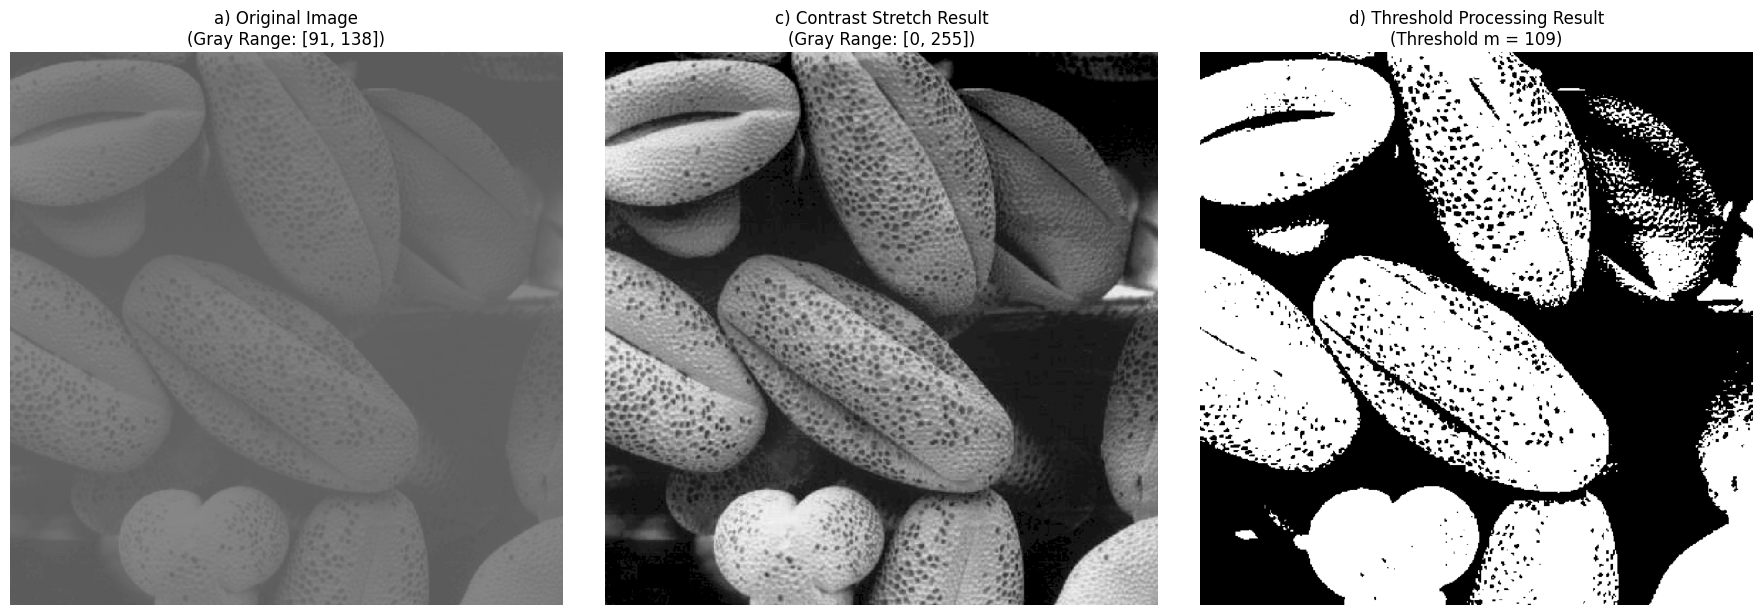

In [14]:
# --- 显示结果 ---

# 创建一个1行3列的图床，用于并排显示三张图片
plt.figure(figsize=(18, 6))

# 显示原始图像
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'a) Original Image\n(Gray Range: [{np.min(original_image)}, {np.max(original_image)}])')
plt.axis('off')

# 显示对比度拉伸后的图像
plt.subplot(1, 3, 2)
plt.imshow(stretched_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'c) Contrast Stretch Result\n(Gray Range: [{np.min(stretched_image)}, {np.max(stretched_image)}])')
plt.axis('off')

# 显示阈值处理后的图像
plt.subplot(1, 3, 3)
plt.imshow(thresholded_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'd) Threshold Processing Result\n(Threshold m = {m})')
plt.axis('off')

# 调整布局并显示图像
plt.tight_layout()
plt.show()


com_error: (-2147352567, '发生意外。', (0, 'Microsoft Word', '很抱歉，找不到您的文件。该项目是否已移动、重命名或删除?\r (C:\\WINDOWS\\system32\\example.docx)', 'wdmain11.chm', 24654, -2146823114), None)

In [1]:
import cv2
import os


In [6]:
input_dir = "original_image"
output_dir = "output_image"
os.makedirs(output_dir, exist_ok=True)

image_filename = "Fig0905(a)(wirebond-mask).tif"
image_path = os.path.join(input_dir, image_filename)

# 2. 加载图像
binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2.resizeWindow('res', 600, 800)
cv2.imshow('res', binary_image)
cv2.waitKey(0)


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1473: error: (-27:Null pointer) NULL window: 'res' in function 'cvResizeWindow'
